## Analyzing Observations as a Percentage of Volume
***
We wish to look at the relationship between observation as a percentage of volume and other variables. We wish to see the mean percentage per each hour of the day, averaged across 5 days. The date is queires via the `front_percentage.sql` file. 

In [89]:
import configparser
from psycopg2 import connect
import psycopg2.sql as pg
import pandas.io.sql as pandasql
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# connect to database
CONFIG = configparser.ConfigParser()
CONFIG.read(r'C:\Users\alouis2\Documents\Python Scripts\db.cfg')
dbset = CONFIG['DBSETTINGS']
con = connect(**dbset)


query = open('front_percentage.sql', 'r',  encoding='utf-8-sig')

frontbt = pd.read_sql_query(query.read(),con)

We create a new column in the dataframe called `percentage`, which will contain obs/volume values. Below are the average bluetooth observations, volumes, and percentages for each hour across 24 hours. 

In [88]:
frontbt['percentage'] = frontbt['obs']/frontbt['volume']
frontbt

,datetime_bin,obs,volume,percentage
0,00:00:00,7.714286,195.428571,0.039474
1,01:00:00,7.285714,268.142857,0.027171
2,02:00:00,7.833333,132.833333,0.058971
3,03:00:00,5.285714,69.428571,0.076132
4,04:00:00,3.571429,47.000000,0.075988
5,05:00:00,6.142857,88.285714,0.069579
6,06:00:00,14.428571,232.285714,0.062116
7,07:00:00,31.857143,374.428571,0.085082
8,08:00:00,32.875000,514.125000,0.063944
9,09:00:00,39.000000,503.125000,0.077516


We plot this percentage value over these time bins. 

C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


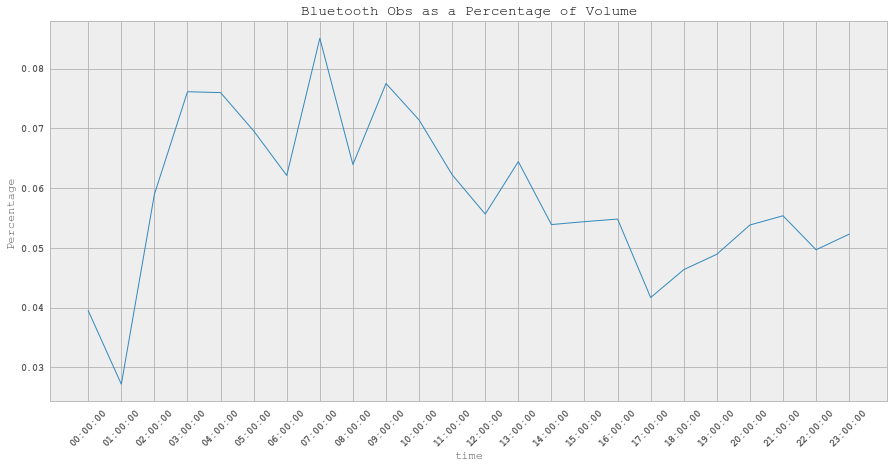

In [86]:
pd.options.display.mpl_style = 'default'
plt.figure(figsize = (15,7))
plt.plot(frontbt['datetime_bin'], frontbt['percentage'])
plt.title('Bluetooth Obs as a Percentage of Volume')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)
base = datetime.time(0,0)
l = [base]
for i in range(0, 23):
    base = (datetime.datetime.combine(datetime.date(1, 1, 1), base) + datetime.timedelta(minutes=60)).time()
    l.append(base)
plt.axes().get_xaxis().set_ticks(l)
plt.xticks(rotation = 45)
plt.ylabel('Percentage')
plt.show()

From the above, the data seems slightly cyclical. Notice how the highest percentages always occur towards the beginning of each day, and the lowest percentages of the data always occur towards the end of the day. 

We plot percentage vs obs and vol. 